In [1]:
%matplotlib inline

import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

import itertools

sns.set();

# Euler's method

Given a first-order explicit ODE (autonomous or non-autonomous) on $\vec{y} \in \mathbb{R}^{n}$ (It is often the case where $n = 1$, so we could drop the vector notation) in the general form

$$\frac{d}{dt}\vec{y}(t) = \vec{f}(t, y(t))$$

the Euler's method is a recursive method with the initial values given by the IVP's initial conditions. It attempts to approximate the solution by tracking its trajectory as ditacted by the ODE.

The approximate solution at time $t_{k+1} = t_{k} + h_{k}$ is given by the equation

$$\vec{y}_{k+1} = \vec{y}_{k} + h_{k} \vec{f}(t_{k}, \vec{y}_{k})$$

where

$$\vec{y}_{k}' = \vec{f}(t_{k}, \vec{y}_{k})$$

given the initial condition

$$\vec{y}_{0} = \vec{y}(0)$$

Note that it is a first-order ODE and it would be great if we could use Euler's method to solve any order ODE. In fact, we can. The way to do that is to use some auxiliary variables as follows:

$$
  \begin{cases}
    \vec{u}_{1} = \vec{y} \\
    \vec{u}_{2} = \vec{y}' \\
    \vdots \\
    \vec{u}_{m} = \vec{y}^{(m-1)}
  \end{cases}
$$

Then

$$
  \begin{cases}
    \vec{u}_{1}' = \vec{y}' = \vec{u}_{2}\\
    \vec{u}_{2}' = \vec{y}'' = \vec{u}_{3}\\
    \vdots \\
    \vec{u}_{m}' = \vec{y}^{(m)} = \vec{f}(t, u_{1}, u_{2}, \cdots, u_{m})
  \end{cases}
$$

And so, we have a system of $m$ fist-order ODE. We can solve it using any method, eg. Euler's method, for first-order ODE.

Below we write a simple still general generator function that yields at each time the tuple $(t_{k}, y_{k})$ given the initial conditions $(t_{0}, \vec{y}_{0})$, the function $\vec{f}$, the step size $h_{k}$ and the maximum number of iterations. Note that both $\vec{y}_{0}$ and $\vec{f}$ can be list-like data structures since they represent objects in $\mathbb{R}^{n}$.

In [2]:
def euler(x_0, y_0, f, step=0.001, k_max=None):
    r"""
    Euler's method for solving first-order ODE.
    
    The function computes `k_max` iterations from the initial conditions `x_0` and `y_0` with
    steps of size `step`. It yields a total of `k_max` + 1 values. The recorrent equation is:
    
    y_{k+1} = y_{k} + h_{k} * f(x_{k}, y_{k})
    
    Parameters
    ----------
    x_0 : float
        The initial value for the independent variable.
    y_0 : array_like
        1-D array of initial values for the dependente variable evaluated at `x_0`.
    f : callable
        The function that represents the first derivative of y with respect to x.
        It must accept two arguments: the point x at which it will be evaluated and
        the value of y at this point.
    step : float, optional
        The size step between each iteration.
    k_max : number
        The maximum number of iterations.
        
    Yields
    ------
    x_k : float
        The point at which the function was evaluated in the last iteration.
    y_k : float
        The value of the function in the last iteration.
    """
    
    if k_max is None: counter = itertools.count()
    else: counter = range(k_max)
    x_k = x_0
    y_k = y_0
    yield (x_k, y_k)
    for k in counter:
        y_k = y_k + step * f(x_k, y_k)
        x_k = x_k + step
        yield (x_k, y_k)

In [3]:
def extract(it):
    r"""
    Extract the values from a iterable of iterables.
    
    The function extracts the values from a iterable of iterables (eg. a list of tuples) to a list
    of coordinates. For example,
    
    [(1, 10), (2, 20), (3, 30), (4, 40)] -> [[1, 2, 3, 4], [10, 20, 30, 40]]
    
    If `it` is a list of M tuples each one with N elements, then `extract` returns
    a list of N lists each one with M elements.
    
    Parameters
    ----------
    it : iterable
        An iterable of iterables.
        
    Returns
    ------
    A list with the lists of first-elements, second-elements and so on.
    """
    
    return list(zip(*it))

## Example 1

The following example was taken from [Guidi], section 8.2, example 37.

The IVP is

$$y' = x^{2} + y^{2}$$

with initial conditions

$$y(0) = 0$$

By Euler's method

$$y_{k+1} = y_{k} + h_{k} f(t, y_{k})$$

Since $x_{k} = x_{0} + h_{k} k$ and $x_{0} = 0$, we have

$$x_{k} = h_{k} k$$

Remember that $y_{k}' = f(t, y_{k})$ and so

$$y_{k+1} = y_{k} + h_{k} (h_{k}^{2} k^{2} + y_{k}^{2})$$

In [4]:
def example1(x_k, y_k):
    return x_k**2 + y_k**2

results = euler(x_0=0.0, y_0=0.0, f=example1, step=0.001, k_max=1000)

results = [(x, y) for k, (x, y) in enumerate(results) if k in range(0, 1001, 100)]
x, y_euler = extract(results)

df1 = pd.DataFrame({'x': x, 'euler': y_euler})

df1 = df1[['x', 'euler']]

df1.head(15)

,x,euler
0,0.0,0.000000
1,0.1,0.000328
2,0.2,0.002647
3,0.3,0.008958
4,0.4,0.021279
5,0.5,0.041664
6,0.6,0.072263
7,0.7,0.115402
8,0.8,0.173730
9,0.9,0.250438


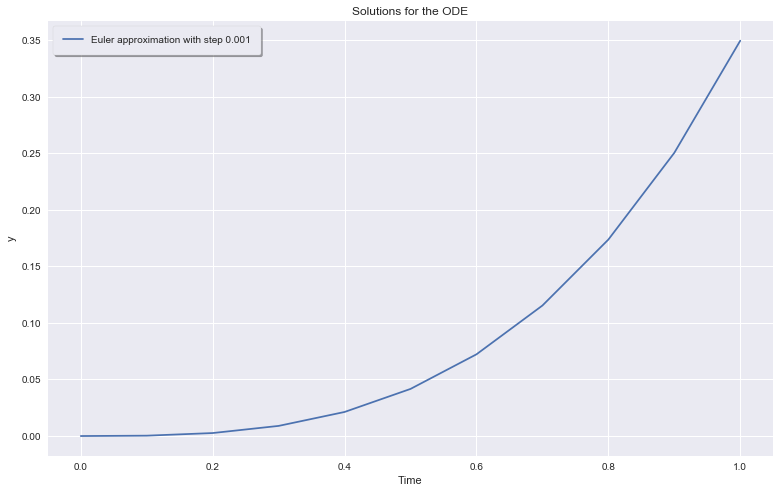

In [5]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df1['x'], df1['euler'], label='Euler approximation with step 0.001')
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Solutions for the ODE", xlabel="Time", ylabel="y");

## Example 2

The following example was taken from [Heath], section 9.3.1, example 9.8.

The IVP is

$$y'(t) = y(t)$$

with initial conditions

$$t_0 = 0$$

Remembering Euler's method

$$y_{k+1} = y_{k} + h_{k} y_{k}$$

In [6]:
def example2(x_k, y_k):
    return y_k

results = euler(x_0=0.0, y_0=1.0, f=example2, step=0.5, k_max=15)
x, y_euler = extract(results)

df2 = pd.DataFrame({'x': x, 'euler': y_euler, 'actual': np.exp(np.arange(0, 8, 0.5))})
df2 = df2[['x', 'euler', 'actual']]

df2.head(15)

,x,euler,actual
0,0.0,1.000000,1.000000
1,0.5,1.500000,1.648721
2,1.0,2.250000,2.718282
3,1.5,3.375000,4.481689
4,2.0,5.062500,7.389056
5,2.5,7.593750,12.182494
6,3.0,11.390625,20.085537
7,3.5,17.085938,33.115452
8,4.0,25.628906,54.598150
9,4.5,38.443359,90.017131


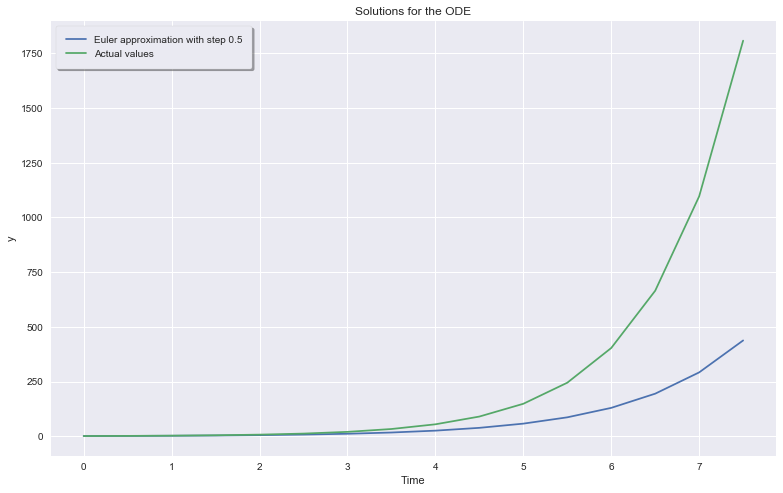

In [7]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df2['x'], df2['euler'], label='Euler approximation with step 0.5')
plt.plot(df2['x'], df2['actual'], label='Actual values')
ax.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Solutions for the ODE", xlabel="Time", ylabel="y");

## Example 3

Consider the following ODE

$$y'' + y = 0$$

with initial conditions

$$y(0) = 1$$

and

$$y'(0) = 0$$

The exact solution for this IVP is $y(t) = \mathit{cos}(t)$.

Let's apply some transformations over this ODE to represent it as a system of first-order ODE.  
$u_{1} = y$ e $u_{2} = y'$. Note that $u_{2}' = y''$, so
$y'' = f(x, y, y')$ becomes $u_{2}' = g(x, u_{1}, u_{2})$.

The previous ODE can now be written as

$u_{2}' = -u_{1}$ com $u_{1}(0) = 1$ e $u_{2}(0) = 0$.

In [8]:
def example3(x_k, u_k):
    return np.array([u_k[1], -u_k[0]])

results = euler(x_0=0.0, y_0=np.array([1.0, 0.0]), f=example3, step=0.03, k_max=1000)
x, ys = extract(results)
y_euler, dy_euler = extract(ys)

df3 = pd.DataFrame({'x': x, 'euler': y_euler, 'dy_euler': dy_euler, 'actual': np.cos(x), 'dy_actual': -np.sin(x)})
df3 = df3[['x', 'euler', 'actual', 'dy_euler', 'dy_actual']]

df3.head(15)

,x,euler,actual,dy_euler,dy_actual
0,0.00,1.000000,1.000000,0.000000,-0.000000
1,0.03,1.000000,0.999550,-0.030000,-0.029996
2,0.06,0.999100,0.998201,-0.060000,-0.059964
3,0.09,0.997300,0.995953,-0.089973,-0.089879
4,0.12,0.994601,0.992809,-0.119892,-0.119712
5,0.15,0.991004,0.988771,-0.149730,-0.149438
6,0.18,0.986512,0.983844,-0.179460,-0.179030
7,0.21,0.981128,0.978031,-0.209056,-0.208460
8,0.24,0.974857,0.971338,-0.238489,-0.237703
9,0.27,0.967702,0.963771,-0.267735,-0.266731


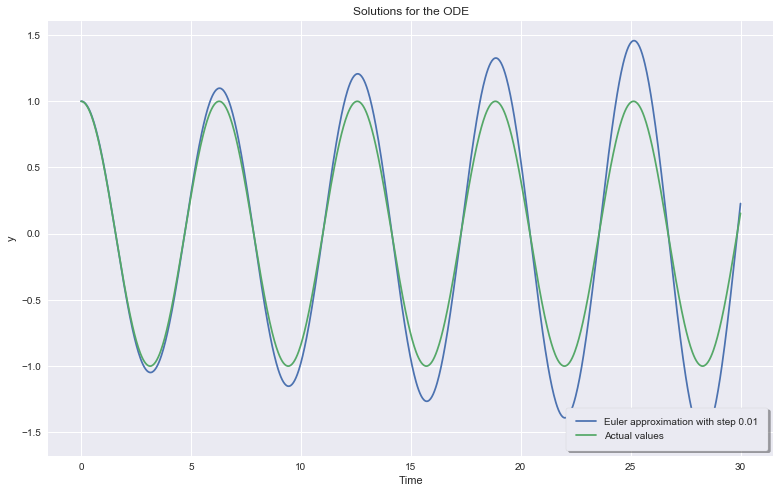

In [9]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df3['x'], df3['euler'], label='Euler approximation with step 0.01')
plt.plot(df3['x'], df3['actual'], label='Actual values')
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Solutions for the ODE", xlabel="Time", ylabel="y");

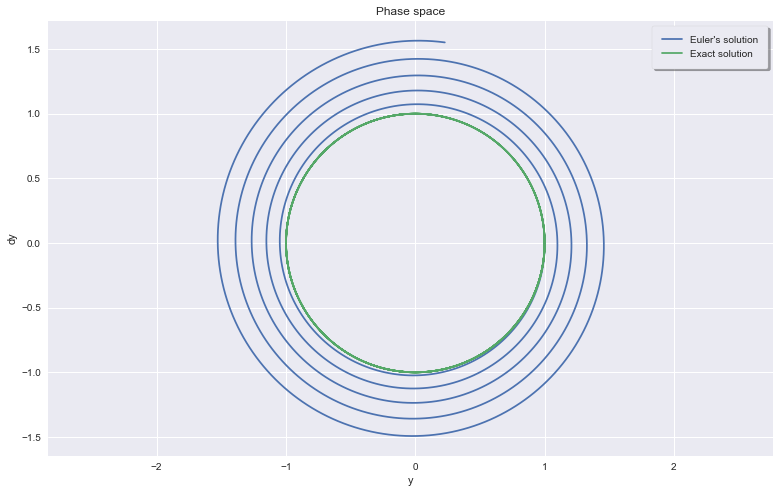

In [10]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df3['euler'], df3['dy_euler'], label="Euler's solution")
plt.plot(df3['actual'], df3['dy_actual'], label='Exact solution')
ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title='Phase space', xlabel='y', ylabel='dy')
ax.axis('equal');

## Example 4: simple pendulum

The simple pendulum system can be represented as ODE as follows:

$$\theta'' + \frac{g}{l}\mathit{sin}(\theta) = 0$$

where $\theta$ is the angle in radians between the vertical line passing through the joint and the wire holding the mass, $g$ is the gravity acceleration and $l$ is the wire length.

We can turn it into a IVP by adding the following equations:

$$\theta(0) = \theta_{0}$$
and
$$\theta'(0) = 0$$

The exact solution for this ODE is

$$\theta(t) = \theta_0 \cos\left({\sqrt{\frac{g}{l}}}\,t\right)$$

whose first derivative relative to $t$ is

$$\theta'(t) = -\theta_{0} \sqrt{\frac{g}{l}} \sin\left({\sqrt{\frac{g}{l}}}\,t\right)$$

Since the IVP has a second-order ODE, we can apply the same transformations we did above to turn it into a system of first-order ODE. Let's call $u_{1}(t) = y(t) = \theta(t)$ and $u_{2}(t) = y'(t) = \theta'(t)$.

This way we end up with a system of first-order ODE that can be solved by using Euler's method or any other first-order method. Now the Euler's method equation becomes:

$$\vec{u}^{(k+1)} = \vec{u}^{(k)} + h_{k} f(t, \vec{u}^{k})$$

where $\vec{u} = [u_{1}, u_{2}]^{T}$.

In [11]:
g = 9.8
l = 10

def example4(t_k, u_k):
    return np.array([u_k[1], -(g/l) * np.sin(u_k[0])])

theta_0 = 0.087 # About 5 degrees.
results = euler(x_0=0.0, y_0=np.array([theta_0, 0.0]), f=example4, step=0.02, k_max=1000)
x, ys = extract(results)
y_euler, dy_euler = extract(ys)

import math
df4 = pd.DataFrame({'x': x, 'euler': y_euler, 'dy_euler': dy_euler,
                       'actual': (theta_0 * np.cos(math.sqrt(g/l)*np.array(x))),
                       'dy_actual': (-theta_0 * math.sqrt(g/l) * np.sin(math.sqrt(g/l)*np.array(x)))})

df4 = df4[['x', 'euler', 'actual', 'dy_euler', 'dy_actual']]

df4.head(15)

,x,euler,actual,dy_euler,dy_actual
0,0.00,0.087000,0.087000,0.000000,-0.000000
1,0.02,0.087000,0.086983,-0.001703,-0.001705
2,0.04,0.086966,0.086932,-0.003406,-0.003410
3,0.06,0.086898,0.086847,-0.005108,-0.005113
4,0.08,0.086796,0.086727,-0.006810,-0.006814
5,0.10,0.086659,0.086574,-0.008509,-0.008512
6,0.12,0.086489,0.086387,-0.010205,-0.010207
7,0.14,0.086285,0.086166,-0.011898,-0.011898
8,0.16,0.086047,0.085911,-0.013587,-0.013585
9,0.18,0.085775,0.085622,-0.015272,-0.015266


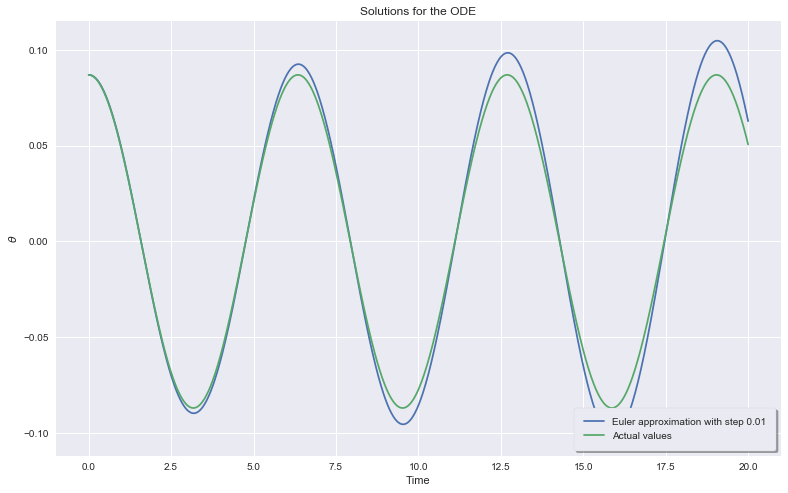

In [12]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df4['x'], df4['euler'], label='Euler approximation with step 0.01')
plt.plot(df4['x'], df4['actual'], label='Actual values')
ax.legend(loc='lower right', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Solutions for the ODE", xlabel="Time", ylabel=r"$\theta$");

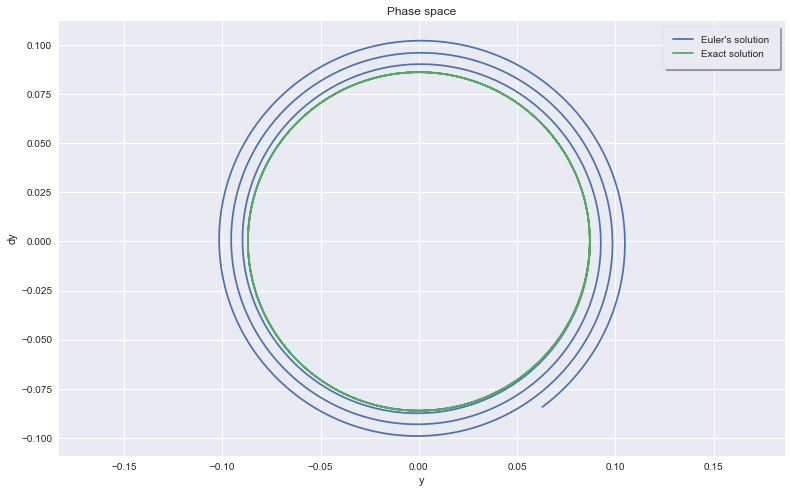

In [13]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df4['euler'], df4['dy_euler'], label="Euler's solution")
plt.plot(df4['actual'], df4['dy_actual'], label="Exact solution")
ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Phase space", xlabel='y', ylabel="dy")
ax.axis('equal');

## Errors

There are two types of errors when solving an ODE numerically. The first is the _rounding error_ which is due to the precision of floating-point arithmetic. The second type is _truncation error_ which is due to the method used.

Truncation error can be of two different types: global error and local error.

The global truncation error in step $k$, $e_{k}$, is the difference between the computed solution through the method, $y_{k}$, and the true solution of the ODE, $y(t_{k})$:

$$\vec{e}_{k} = \vec{y}_{k} - \vec{y}(t_{k})$$

The local truncation error in step $k$, $\tau_{k}$, is the difference between the approximate and exact increment per unit step:

$$\vec{\tau}_{k} = \frac{\vec{y}(t_{k}) - \vec{y}(t_{k-1}) - f(t, \vec{y}_{k})}{h}$$

We follow with the pendulum example to demonstrate error computations in practice.

We know that  the true solution for the simple pendulum IVP

$$\theta'' + \frac{g}{l}\mathit{sin}(\theta) = 0$$

with initial values

$$\theta(0) = \theta_{0}$$
and
$$\theta'(0) = 0$$

is

$$\theta(t) = \theta_0 \cos\left({\sqrt{\frac{g}{l}}}\,t\right)$$

whose first derivative relative to $t$ is

$$\theta'(t) = -\theta_{0} \sqrt{\frac{g}{l}} \sin\left({\sqrt{\frac{g}{l}}}\,t\right)$$

Then we know the true solution $\theta$ at each time $t_{k}$ and its first derivative. We can proceed and estimate the global and local errors and see how they behave.

In [14]:
df4['global_err'] = df4['actual'] - df4['euler']
df4.loc[0, 'local_err'] = 0.0
df4.loc[1:, 'local_err'] = (df4['actual'].diff() - df4['euler'].diff())

df4.head(15)

,x,euler,actual,dy_euler,dy_actual,global_err,local_err
0,0.00,0.087000,0.087000,0.000000,-0.000000,0.000000,0.000000
1,0.02,0.087000,0.086983,-0.001703,-0.001705,-0.000017,-0.000017
2,0.04,0.086966,0.086932,-0.003406,-0.003410,-0.000034,-0.000017
3,0.06,0.086898,0.086847,-0.005108,-0.005113,-0.000051,-0.000017
4,0.08,0.086796,0.086727,-0.006810,-0.006814,-0.000068,-0.000017
5,0.10,0.086659,0.086574,-0.008509,-0.008512,-0.000085,-0.000017
6,0.12,0.086489,0.086387,-0.010205,-0.010207,-0.000102,-0.000017
7,0.14,0.086285,0.086166,-0.011898,-0.011898,-0.000119,-0.000017
8,0.16,0.086047,0.085911,-0.013587,-0.013585,-0.000136,-0.000017
9,0.18,0.085775,0.085622,-0.015272,-0.015266,-0.000153,-0.000017


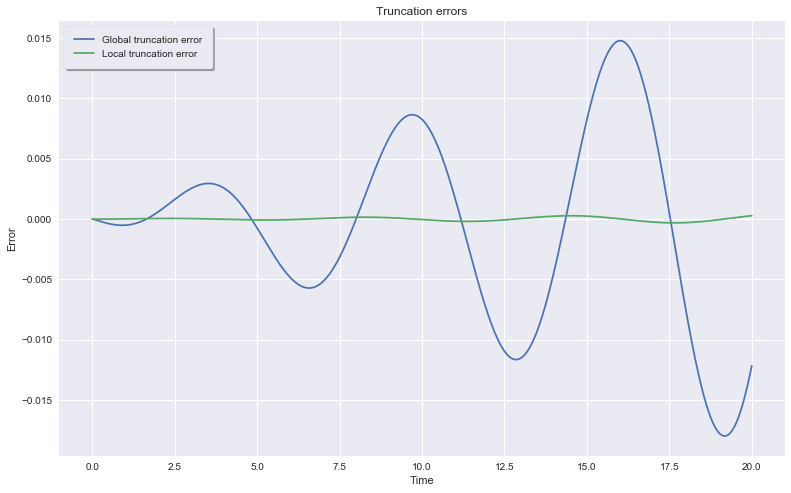

In [15]:
fig, ax = plt.subplots(figsize=(13, 8))
plt.plot(df4['x'], df4['global_err'], label="Global truncation error")
plt.plot(df4['x'], df4['local_err'], label="Local truncation error")
ax.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True)
ax.set(title="Truncation errors", xlabel="Time", ylabel="Error");

As we can see, the global error grows indefinitely although the local errors remain near zero. This seems to be the case where the global error is the sum of the local errors. However, it is important to note that this is not always the case: The global error may be greater or smaller than the sum of local errors. In general, if the solutions of the ODE are diverging, then the global error is greater than the sum of local errors. On the other hand, if the solutions of the ODE are converging, then the global error is smaller than the sum of local errors.

In [16]:
np.allclose(df4['global_err'], df4['local_err'].cumsum()) # Equality for floats.

True

## References

* Guidi, L., Notas da disciplina Cálculo Numérico. Disponível em [Notas da disciplina Cálculo Numérico](http://www.mat.ufrgs.br/~guidi/grad/MAT01169/calculo_numerico.pdf)
* Heath, M. T., Scientific Computing: An Introductory Survey, 2nd Edition, McGraw Hill, 2002.